In [1]:
from sklearn import svm
import pandas as pd
import copy
import numpy as np
import sklearn
from sklearn.model_selection import train_test_split
import random
from sklearn.cross_decomposition import PLSRegression

In [2]:
raw_standard = pd.read_excel('drive/My Drive/Msc/data/FDPASS.xlsx')
raw_miss_25 = pd.read_excel('drive/My Drive/Msc/data/FDPASS_missingdata_25%.xlsx')
raw_miss_15 = pd.read_excel('drive/My Drive/Msc/data/FDPASS_missingdata_15%.xlsx')
raw_miss_5 = pd.read_excel('drive/My Drive/Msc/data/FDPASS_missingdata_5%.xlsx')
raw_plsr = pd.read_excel('drive/My Drive/Msc/data/FDPASS_Y.xlsx')

In [3]:
import pandas as pd
pd.set_option('display.max_columns',1000)
pd.set_option('display.width', 1000)
pd.set_option('display.max_colwidth',1000)
print(raw_plsr)

    Patient local name  AneurysmAneurysm location                  Unnamed: 2           Aneurysm location   Side      volume     surface  neck surface  neck width      depth  aspect ratio  non-sphericity index  maximum diameter Rupture status
0      USFD_UNIGE_0004                          2  Ophthalmic segment carotid  Ophthalmic segment carotid  Right   29.545345   39.029429     15.957139    4.839732   3.125424      0.645784              0.060115          4.786939              N
1      USFD_UNIGE_0005                          1              Posterior Comm              Posterior Comm  Right  724.287008  401.590329     24.306223    5.906499  11.666993      1.975281              0.229159         13.313550              Y
2      USFD_UNIGE_0010                          1              Posterior Comm              Posterior Comm  Right   27.532560   43.873938      7.510530    3.302652   3.509575      1.062654              0.202314          5.537727              N
3      USFD_UNIGE_0013      

In [4]:
def convert(raw_data):
  data = copy.deepcopy(raw_data.values[1:,5:])
  for i in data:
    if i[-1] == 1.0 or i[-1] == 'Y':
      i[-1] = bin(1)
    elif i[-1] == 2.0 or i[-1] == 'N':
      i[-1] = bin(0)
  return data

In [5]:
# Augmentation, balance the ratio of positive and negative.
def augmentation_balance(data,bias):
  bias = random.uniform(-bias,bias)
  positive = list()
  negative = list()
  for i in data:
    if i[-1] == bin(1):
      positive.append(i)
    elif i[-1] == bin(0):
      negative.append(i)

  for i in range(abs(len(positive)-len(negative))):
    if len(positive)-len(negative) > 0: # Enlarge the negative set when negative set < positive set
      index_a = random.randint(0,len(negative)-1)
      index_b = random.randint(0,len(negative[0])-2)
      #print(negative[index_a])
      temp = copy.deepcopy(negative[index_a])
      temp[index_b] += bias
      negative.append(temp)
    elif len(positive)-len(negative) < 0: # Enlarge the positive set when positive set < negative set
      index_a = random.randint(0,len(positive)-1)
      index_b = random.randint(0,len(positive[0])-2)
      #print(positive[index_a])
      temp = copy.deepcopy(positive[index_a])
      temp[index_b] += bias
      positive.append(temp)

  a = np.array(positive)
  b = np.array(negative)
  return np.concatenate((a,b),axis=0)

In [6]:
# Augmentation, enlarge the dataset.
def augmentation_enlarge(raw_data, maxNumber, bias):
  data = copy.deepcopy(raw_data)
  data = data.tolist()
  bias = random.uniform(-bias,bias)
  length = len(data)
  number = 0
  for n in range(maxNumber):
   for i in range(length):
     for j in range(len(data[i])-1):
        if number < maxNumber:
          if data[i][j] + bias > 0:
            data[i][j] += bias
          elif data[i][j] + bias < 0:
            data[i][j] = 0
          data.append(data[i])
          number += 1
  output = np.array(data)
  #print('number:',number)
  return output

In [ ]:
  # Test
  print(raw_miss_25)
  raw_miss_temp = convert(raw_miss_25)
  print(raw_miss_temp)
  raw_data_miss_temp = augmentation_balance(raw_miss_temp,0.001)
  raw_data_miss = augmentation_enlarge(raw_data_miss_temp, 800, 0.001)
  np.random.shuffle(raw_data_miss)
  x_m,y_m = np.split(raw_data_miss, (9,), axis=1)
  y_m=y_m.flatten()
  print(len(x_m))
  print(len(y_m))
  #print(raw_miss_temp)

         Name  Location   Side   Age  Gender Max Diam    Depth Neck Width  Aspect Ratio Sac Volume Sac Surface Neck Surface  Non-Spherecity Side Branch Diam   Q1
0         NaN       NaN    NaN   NaN     NaN     [mm]     [mm]       [mm]           NaN      [mm3]       [mm2]        [mm2]             NaN             [mm]  NaN
1   USFD_0006       NaN   Left  53.0     1.0  9.05742  4.75248    5.47385      1.150757    68.7621     75.2621      11.8706        0.144019                0  1.0
2   USFD_0008       NaN   Left  54.0     0.0  5.18569  3.41575    5.47385      0.846575    39.5998     51.7606      10.7351        0.159798                0  1.0
3   USFD_0019       NaN   Left  49.0     1.0   5.0884   3.3101    4.41879      0.749096    299.524     171.071      14.2021        0.059482                0  1.0
4   USFD_0020       NaN  Right  63.0     1.0  8.75537  6.85911    4.97767      1.246905    103.502     108.831      21.6358        0.222524         0.515417  2.0
..        ...       ...    .

In [ ]:
# Test
raw_miss_y = convert(raw_plsr)
raw_miss_y = augmentation_balance(raw_miss_y, 0.001)
# raw_miss_data = augmentation_enlarge(raw_miss_data, 800, 0.001)
np.random.shuffle(raw_miss_y)
x_y,y_y = np.split(raw_miss_y, (len(raw_miss_y[0])-1,), axis=1)
y_y=y_y.flatten()

print(x_y)

[[7.821931444543961 17.06719471935838 6.648797690526799 ...
  0.823797978695085 0.113821266928024 3.8060129532499998]
 [76.42352201754753 98.23730186953155 7.1910515853877355 ...
  1.99819217507586 0.296362349565482 8.43713713012]
 [419.5413456747183 252.8321234881224 59.66352790046854 ...
  0.852912224211203 0.14920475182003 11.8143547488]
 ...
 [214.863352286499 163.810805562037 23.7611077091823 ... 1.15801701500141
  0.15943142675007899 9.90946067352]
 [146.1147295000252 132.9837666921185 18.0155611737663 ...
  1.5995569977647137 0.199296920229164 10.1395497865]
 [4.84835231325624 11.6575804153731 5.01023232395507 ...
  0.600821421582749 0.0568187527274794 3.0542311332899996]]


In [ ]:
# Test
raw_standard_y = convert(raw_plsr)
raw_standard_y = augmentation_balance(raw_standard_y, 0.001)
raw_standard_data = augmentation_enlarge(raw_standard_y, 800, 0.001)
np.random.shuffle(raw_standard_y)
x_s,y_s = np.split(raw_standard_y, (len(raw_standard_y[0])-1,), axis=1)
y_s=y_s.flatten()

print(x_s)

[[11.7246922453127 21.0028410096132 8.15528989525178 ...
  0.588824797478525 0.0568146354827096 3.83400543928]
 [4.825309823101942 13.934450803521301 2.375366399456691 ...
  1.57727803191289 0.213435377457116 3.3780140085399997]
 [4.67573491586644 12.0750272272188 3.28481477966673 ...
  0.909718784903329 0.111168851846348 3.02744642597]
 ...
 [316.1575084759391 224.6442697490855 19.79632519766368 ...
  1.66180005809284 0.207046381657523 11.5248649911]
 [61.6108601270218 78.62681483402778 4.284757726891339 ... 2.214
  0.238491138035552 7.49740298734]
 [4.82571085643423 12.3350120929934 3.5426884707942 ... 0.909334997817761
  0.111395009215797 5.95295977467]]


In [ ]:
# Test
train_data_m,test_data_m,train_label_m,test_label_m =train_test_split(x_m,y_m, train_size=0.75,test_size=0.25) #sklearn.model_selection.
#print(train_data_m,train_label_m)

train_data_s,test_data_s,train_label_s,test_label_s =train_test_split(x_s,y_s, train_size=0.75,test_size=0.25) #sklearn.model_selection.
#print(train_data_s,train_label_s)

In [ ]:
# Test
classifier_test=svm.SVC(kernel='rbf', decision_function_shape='ovo')
classifier_test.fit(train_data_s,train_label_s)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovo', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
# Test
classifier_standard=svm.SVC()
classifier_standard.fit(train_data_s,train_label_s)

print("Training set: ",classifier_standard.score(train_data_s,train_label_s))
print("Test set: ",classifier_standard.score(test_data_s,test_label_s))

Training set:  0.8032786885245902
Test set:  0.7142857142857143


In [ ]:
# Test
classifier_miss=svm.SVC()
classifier_miss.fit(train_data_m,train_label_m)

print("Training set: ",classifier_miss.score(train_data_m,train_label_m))
print("Test set: ",classifier_miss.score(test_data_m,test_label_m))

Training set:  0.6072916666666667
Test set:  0.678125


# Original SVM

In [ ]:
# The basic SVM (Benchmark)
standard_train = list()
standard_test = list()
miss_train = list()
miss_test = list()
for i in range(100):

  raw_miss_data = convert(raw_miss_5)
  raw_miss_data = augmentation_balance(raw_miss_data, 0.001)
  #raw_miss_data = augmentation_enlarge(raw_miss_data, 800, 0.001)
  np.random.shuffle(raw_miss_data)
  x_m,y_m = np.split(raw_miss_data, (len(raw_miss_data[0])-1,), axis=1)
  y_m=y_m.flatten()
  #print('Number of x_m: ',len(x_m))
  #print('Number of y_m: ',len(y_m))

  raw_standard_data = convert(raw_standard)
  raw_standard_data = augmentation_balance(raw_standard_data, 0.001)
  #raw_standard_data = augmentation_enlarge(raw_standard_data, 800, 0.001)
  np.random.shuffle(raw_standard_data)
  x_s,y_s = np.split(raw_standard_data, (len(raw_standard_data[0])-1,), axis=1)
  y_s=y_s.flatten()
  #print('Number of x_s: ',len(x_s))
  #print('Number of y_s: ',len(y_s))

  train_data_m,test_data_m,train_label_m,test_label_m =train_test_split(x_m,y_m, train_size=0.8,test_size=0.2) #sklearn.model_selection.
  train_data_s,test_data_s,train_label_s,test_label_s =train_test_split(x_s,y_s, train_size=0.8,test_size=0.2) #sklearn.model_selection.
  classifier_standard=svm.SVC()
  classifier_standard.fit(train_data_s,train_label_s)
  classifier_miss=svm.SVC()
  classifier_miss.fit(train_data_m,train_label_m)

  standard_train.append(classifier_standard.score(train_data_s,train_label_s))
  standard_test.append(classifier_standard.score(test_data_s,test_label_s))
  miss_train.append(classifier_miss.score(train_data_m,train_label_m))
  miss_test.append(classifier_miss.score(test_data_m,test_label_m))


#print(standard_train)
print('standard_train ',np.mean(standard_train))
print('=======================')
#print(standard_test)
print('standard_test: ',np.mean(standard_test))
print('=======================')
#print(miss_train)
print('miss_test: ',np.mean(miss_train))
print('=======================')
#print(miss_test)
print('miss_test: ',np.mean(miss_test))

standard_train  0.6594117647058824
standard_test:  0.64
miss_test:  0.6231372549019608
miss_test:  0.6007692307692308


## Test

In [ ]:
raw_miss_y = convert(raw_y)
raw_miss_y = augmentation_balance(raw_miss_y, 0.001)
#raw_miss_data = augmentation_enlarge(raw_miss_data, 800, 0.001)
np.random.shuffle(raw_miss_y)
x_y,y_y = np.split(raw_miss_y, (len(raw_miss_y[0])-1,), axis=1)
y_y=y_y.flatten()
print('Number of x_s: ',len(x_y))
print('Number of y_s: ',len(y_y))

In [ ]:
raw_standard_data = convert(raw_standard)
raw_standard_data = augmentation_balance(raw_standard_data, 0.001)
raw_standard_data = augmentation_enlarge(raw_standard_data, 12, 0.001)
np.random.shuffle(raw_standard_data)
x_s,y_s = np.split(raw_standard_data, (len(raw_standard_data[0])-1,), axis=1)
y_s=y_s.flatten()
print('Number of x_s: ',len(x_s))
print('Number of y_s: ',len(y_s))

Number of x_s:  140
Number of y_s:  140


In [ ]:
from sklearn.cross_decomposition import PLSRegression
pls2 = PLSRegression(n_components=8)
pls2.fit(x_s, x_y)
X_pred = pls2.predict(x_s)
print(X_pred)

[[3.51002624e+02 1.77902592e+02 1.83614874e+01 ... 1.32011526e+00
  1.66213868e-01 8.46831599e+00]
 [1.87581880e+02 1.22657457e+02 1.75265924e+01 ... 1.24558759e+00
  1.76133511e-01 7.18169231e+00]
 [3.15219115e+02 1.75928994e+02 1.97636790e+01 ... 1.40367866e+00
  1.86358639e-01 8.60218264e+00]
 ...
 [8.70059876e+01 7.97668431e+01 1.34546917e+01 ... 1.21106888e+00
  1.64702074e-01 7.30880189e+00]
 [1.57824579e+02 1.03053748e+02 1.55656121e+01 ... 1.15213954e+00
  1.58702882e-01 7.26836972e+00]
 [3.43017285e+02 1.68601354e+02 1.80319034e+01 ... 1.33690603e+00
  1.75137471e-01 8.09385935e+00]]


In [ ]:
train_data_m,test_data_m,train_label_m,test_label_m =train_test_split(x_y,y_y, train_size=0.8,test_size=0.2) #sklearn.model_selection.
train_data_s,test_data_s,train_label_s,test_label_s =train_test_split(X_pred,y_y, train_size=0.8,test_size=0.2) #sklearn.model_selection.
classifier_plsr=svm.SVC()
classifier_plsr.fit(train_data_s,train_label_s)
classifier_miss=svm.SVC()
classifier_miss.fit(train_data_m,train_label_m)

print('PLSR train: ',classifier_plsr.score(train_data_s,train_label_s))
print('PLSR test: ',classifier_plsr.score(test_data_s,test_label_s))
print('Standard train: ',classifier_miss.score(train_data_m,train_label_m))
print('Standard test: ',classifier_miss.score(test_data_m,test_label_m))

PLSR train:  0.6160714285714286
PLSR test:  0.2857142857142857
Standard train:  0.5714285714285714
Standard test:  0.25


# PLSR

In [ ]:
standard_train_rupture = list()
standard_test_rupture = list()
plsr_train_rupture = list()
plsr_test_rupture = list()
plsr = PLSRegression(n_components=8,scale=True)

for i in range(200):

  raw_plsr_data = convert(raw_plsr)
  raw_plsr_data = augmentation_balance(raw_plsr_data, 0.001)
  #raw_plsr_data = augmentation_enlarge(raw_plsr_data, 12, 0.001)
  np.random.shuffle(raw_plsr_data)
  x_plsr,y_plsr = np.split(raw_plsr_data, (len(raw_plsr_data[0])-1,), axis=1)
  y_plsr=y_plsr.flatten()
  #print('Number of x_plsr: ',len(x_plsr))
  #print('Number of y_plsr: ',len(y_plsr))

  raw_standard_data = convert(raw_standard)
  raw_standard_data = augmentation_balance(raw_standard_data, 0.001)
  raw_standard_data = augmentation_enlarge(raw_standard_data, 12, 0.001)
  np.random.shuffle(raw_standard_data)
  x_standard,y_standard = np.split(raw_standard_data, (len(raw_standard_data[0])-1,), axis=1)
  y_standard=y_standard.flatten()
  #print('Number of x_standard: ',len(x_standard))
  #print('Number of y_standard: ',len(y_standard))

  plsr.fit(x_plsr, x_standard)
  X_pred = plsr.predict(x_plsr)

  train_data_plsr,test_data_plsr,train_label_plsr,test_label_plsr =train_test_split(X_pred,y_plsr, train_size=0.8,test_size=0.2) #sklearn.model_selection.
  train_data_standard,test_data_standard,train_label_standard,test_label_standard =train_test_split(x_plsr,y_plsr, train_size=0.8,test_size=0.2) #sklearn.model_selection.
  classifier_standard=svm.SVC()
  classifier_standard.fit(train_data_standard,train_label_standard)
  classifier_plsr=svm.SVC()
  classifier_plsr.fit(train_data_plsr,train_label_plsr)

  standard_train_rupture.append(classifier_standard.score(train_data_standard,train_label_standard))
  standard_test_rupture.append(classifier_standard.score(test_data_standard,test_label_standard))
  plsr_train_rupture.append(classifier_plsr.score(train_data_plsr,train_label_plsr))
  plsr_test_rupture.append(classifier_plsr.score(test_data_plsr,test_label_plsr))


#print(standard_train)
print('standard_train ',np.mean(standard_train_rupture))
print('=======================')
#print(standard_test)
print('standard_test: ',np.mean(standard_test_rupture))
print('=======================')
#print(plsr_train)
print('plsr_train: ',np.mean(plsr_train_rupture))
print('=======================')
#print(plsr_test)
print('plsr_test: ',np.mean(plsr_test_rupture))

standard_train  0.5770089285714286
standard_test:  0.4833928571428572
plsr_train:  0.5929464285714287
plsr_test:  0.5469642857142857


# DBN

In [13]:
import torch
from torch.nn.parameter import Parameter
from torch.nn import functional as F
from torch.nn import init
from torch.autograd import Variable
import numpy as np

import sys
sys.path.append('..')
from core.module import Module
from core.pre_module import Pre_Module
from core.layer import Linear2
device = torch.device("cuda") # if torch.cuda.is_available() else "cpu"


class RBM(torch.nn.Module):
    def __init__(self, w, b, unit_type, cnt, **kwargs):
        default = {'cd_k': 1, 
                   'lr': 1e-3}
        for key in default.keys():
            if key in kwargs:
                setattr(self, key, kwargs[key])
            else:
                setattr(self, key, default[key])
        
        kwargs['task'] = 'usp'
        self.name = 'RBM-{}'.format(cnt+1)
        self.unit_type = unit_type
        self.dvc = kwargs['dvc']
        super().__init__()
        
        self.w, self.b = w, b
        self.b2 = Parameter(torch.Tensor(w.size(1)))
        init.constant_(self.b2, 0)
        
        #print_module:
        print()
        #print_parameter:
        print("{}'s Parameters(".format(self.name))
        print('  unit\t{}-{}'.format(unit_type[0], unit_type[1]))
        for name, para in self.named_parameters(): print('  {}\t{}'.format(name, para.size()))
        print(')')
    
    def transfrom(self, x, direction):
        if direction == 'v2h':
            i = 0
            z = x @ self.w.t() + self.b
        else:
            i = 1
            z = x @ self.w + self.b2
        if self.unit_type[i] in ['Binary', 'b']:
            p = F.sigmoid(z)
            s = (torch.rand(p.size())< p).float().to(self.dvc)
            return p, s
        elif self.unit_type[i] in ['Gaussian', 'g']:
            u = z
            s = u
            return u, s
    
    def _feature(self, x):
        _, out = self.transfrom(x,'v2h')
        return out
    
    def forward(self, x):
        v0 = x
        ph0, h0 = self.transfrom(v0,'v2h') 
        pvk, vk = self.transfrom(h0,'h2v')
        for k in range(self.cd_k-1):
            phk, hk = self.transfrom(vk,'v2h')
            pvk, vk = self.transfrom(hk,'h2v')
        phk, hk = self.transfrom(vk,'v2h')
        vk = pvk
        hk = phk
        return v0, h0, vk, hk
    
    def _update(self, v0, h0, vk, hk):
        positive = torch.bmm(h0.unsqueeze(-1),v0.unsqueeze(1))
        negative = torch.bmm(hk.unsqueeze(-1),vk.unsqueeze(1))
        
        delta_w = positive - negative
        delta_b = h0 - hk
        delta_a = v0 - vk
        
        self.w += (torch.mean(delta_w, 0) * self.lr)
        self.b += (torch.mean(delta_b, 0) * self.lr)
        self.b2 += (torch.mean(delta_a, 0) * self.lr)
        
        l1_w, l1_b, l1_a = torch.mean(torch.abs(delta_w)), torch.mean(torch.abs(delta_b)), torch.mean(torch.abs(delta_a))
        return l1_w, l1_b, l1_a
    
    def batch_training(self, epoch):
        if epoch == 1:
            #print('\nTraining '+self.name+ ' in {}'.format(self.dvc) +':')
            print('\nTraining '+self.name+ ' in {}'.format(self.dvc) + self.dvc_info +':')
        self = self.to(self.dvc)
        self.eval()
        
        with torch.no_grad():
            for batch_idx, (data, target) in enumerate(self.train_loader):
                data = data.to(self.dvc)
                v0,h0,vk,hk = self.forward(data)
                # print(v0.mean(), h0.mean(),vk.mean(),hk.mean())
                l1_w, l1_b, l1_a = self._update(v0, h0, vk, hk)
                if (batch_idx + 1) % 10 == 0 or (batch_idx + 1) == len(self.train_loader):
                    msg_str = 'Epoch: {} - {}/{} | |Δw| = {:.4f}, |Δb| = {:.4f}, |Δa| = {:.4f}'.format(
                            epoch, batch_idx + 1, len(self.train_loader), l1_w, l1_b, l1_a)
                    sys.stdout.write('\r'+ msg_str)
                    sys.stdout.flush()
    def test(self, epoch):
        if epoch == 1:
            #print('\nTraining '+self.name+ ' in {}'.format(self.dvc) +':')
            print('\nTraining '+self.name+ ' in {}'.format(self.dvc) + self.dvc_info +':')
        self = self.to(self.dvc)
        self.eval()
        
        with torch.no_grad():
            for batch_idx, (data, target) in enumerate(self.test_loader):
                data = data.to(self.dvc)
                v0,h0,vk,hk = self.forward(data)
                # print(v0.mean(), h0.mean(),vk.mean(),hk.mean())
                l1_w, l1_b, l1_a = self._update(v0, h0, vk, hk)
                if (batch_idx + 1) % 10 == 0 or (batch_idx + 1) == len(self.test_loader):
                    msg_str = 'Epoch: {} - {}/{} | |Δw| = {:.4f}, |Δb| = {:.4f}, |Δa| = {:.4f}'.format(
                            epoch, batch_idx + 1, len(self.test_loader), l1_w, l1_b, l1_a)
                    sys.stdout.write('\r'+ msg_str)
                    sys.stdout.flush()

class DBN(Module, Pre_Module):  
    def __init__(self, **kwargs):
        if 'name' in kwargs.keys(): 
            kwargs['_name'] = kwargs['name']
            del kwargs['name']
        if '_name' not in kwargs.keys(): kwargs['_name'] = 'DBN'
        
        # Check if the training type is setted
        if 'v_type' not in kwargs.keys():
            kwargs['v_type'] = ['Gaussian']
        if 'h_type' not in kwargs.keys():
            kwargs['h_type'] = ['Gaussian']
        
        Module.__init__(self, **kwargs)
        
        if type(self.h_type) != list:
            self.h_type = [self.h_type]
        
        if hasattr(self,'hidden_func') == False:
            self.hidden_func = []
            for tp in self.h_type:
                if tp in ['Gaussian', 'g']: self.hidden_func.append('a')
                elif tp in ['Binary', 'b']: self.hidden_func.append('s')
                else: raise Exception("Unknown h_type!")
        self.dvc_info = device.type
        #self.train_loader = self.train_loader
        self._feature, self._output = self.Sequential(out_number = 8)
        self.opt()
        self.Stacked()

    def forward(self, x):
        x = self._feature(x)
        x = self._output(x)
        return x
    
    def add_pre_module(self, w, b, cnt):
        if type(self.v_type) != list: 
            self.v_type = [self.v_type]
        v_type = self.v_type[np.mod(cnt, len(self.v_type))]
        h_type = self.h_type[np.mod(cnt, len(self.h_type))]
        
        rbm = RBM(w, b, [v_type, h_type], cnt, **self.kwargs)
        return rbm

In [14]:
parameter = {'struct': [8,16,32,8],
        'h_type': ['Gaussian', 'Binary'],
        'output_func': 'Affine',
        'v_type': ['Binary', 'Binary'],
        'dropout': 0.0,
        'task': 'prd',
        'flatten': True}
model_dbn = DBN(**parameter)


DBN(
  (L): MSELoss()
  (_feature): Sequential(
    (0): Linear(in_features=8, out_features=16, bias=True)
    (1): Affine()
    (2): Linear(in_features=16, out_features=32, bias=True)
    (3): Sigmoid()
  )
  (_output): Sequential(
    (0): Linear(in_features=32, out_features=8, bias=True)
    (1): Affine()
  )
)
DBN's Parameters(
  _feature.0.weight:	torch.Size([16, 8])
  _feature.0.bias:	torch.Size([16])
  _feature.2.weight:	torch.Size([32, 16])
  _feature.2.bias:	torch.Size([32])
  _output.0.weight:	torch.Size([8, 32])
  _output.0.bias:	torch.Size([8])
)
DBN's Optimizer: Adam (
Parameter Group 0
    amsgrad: False
    betas: (0.9, 0.999)
    eps: 1e-08
    lr: 0.001
    weight_decay: 0
)

RBM-1's Parameters(
  unit	Binary-Gaussian
  w	torch.Size([16, 8])
  b	torch.Size([16])
  b2	torch.Size([8])
)

RBM-2's Parameters(
  unit	Binary-Binary
  w	torch.Size([32, 16])
  b	torch.Size([32])
  b2	torch.Size([16])
)


In [15]:
# Data Pre-process
# PLSR model
plsr = PLSRegression(n_components=8,scale=True)

# The first dataset 
# Candidates: 'raw_standard'(X dataset), 'raw_miss_5'(X dataset), 'raw_miss_15'(X dataset), 'raw_miss_25'(X dataset), 
raw_standard_data = convert(raw_standard)
raw_standard_data = augmentation_balance(raw_standard_data, 0.001)
raw_standard_data = augmentation_enlarge(raw_standard_data, 8012, 0.001)
np.random.shuffle(raw_standard_data)
x_standard,y_standard = np.split(raw_standard_data, (len(raw_standard_data[0])-1,), axis=1)
y_standard=y_standard.flatten()
print('Number of x_standard: ',len(x_standard))
print('Number of y_standard: ',len(y_standard))


# The second dataset  
# Candidate: 'raw_plsr'(Y dataset)
raw_plsr_data = convert(raw_plsr)
raw_plsr_data = augmentation_balance(raw_plsr_data, 0.001)
raw_plsr_data = augmentation_enlarge(raw_plsr_data, 8000, 0.001)
np.random.shuffle(raw_plsr_data)
x_plsr,y_plsr = np.split(raw_plsr_data, (len(raw_plsr_data[0])-1,), axis=1)
y_plsr=y_plsr.flatten()
print('Number of x_plsr: ',len(x_plsr))
print('Number of y_plsr: ',len(y_plsr))


# The combined dataset
plsr.fit(x_plsr, x_standard)
X_pred = plsr.predict(x_plsr)

Number of x_standard:  8140
Number of y_standard:  8140
Number of x_plsr:  8140
Number of y_plsr:  8140


In [19]:
train_data_standard,test_data_standard,train_label_standard,test_label_standard =train_test_split(x_plsr,y_plsr, train_size=0.8,test_size=0.2) #sklearn.model_selection.
# Convert binary type to bool type
# Convert binary type to bool type
count = 0
for i in train_label_standard:
  if i == '0b0':
    train_label_standard[count] = 0
  elif i == '0b1':
    train_label_standard[count] = 1
  count+=1

count = 0
for i in test_label_standard:
  if i == '0b0':
    test_label_standard[count] = 0
  elif i == '0b1':
    test_label_standard[count] = 1
  count+=1
print(train_label_standard)
print(test_label_standard)

['0' '0' '1' ... '1' '0' '0']
['1' '1' '0' ... '0' '0' '0']


In [20]:
train_data_plsr,test_data_plsr,train_label_plsr,test_label_plsr =train_test_split(X_pred,y_plsr, train_size=0.8,test_size=0.2) #sklearn.model_selection.
# Convert binary type to bool type
count = 0
for i in train_label_plsr:
  if i == '0b0':
    train_label_plsr[count] = 0
  elif i == '0b1':
    train_label_plsr[count] = 1
  count+=1

count = 0
for i in test_label_plsr:
  if i == '0b0':
    test_label_plsr[count] = 0
  elif i == '0b1':
    test_label_plsr[count] = 1
  count+=1
print(train_label_plsr)
print(test_label_plsr)

['1' '0' '1' ... '1' '0' '1']
['0' '1' '1' ... '1' '1' '1']


## Trained on the single dataset

In [22]:
train_data_standard = train_data_standard.astype(np.float64)
test_data_standard = test_data_standard.astype(np.float64)
train_label_standard = train_label_standard.astype(np.bool)
test_label_standard = test_label_standard.astype(np.bool)

print(train_label_standard)
print(test_label_standard)

model_dbn = DBN(**parameter)
model_dbn.load_data((train_data_standard,train_label_standard,test_data_standard,test_label_standard),1)

[False False  True ...  True False False]
[ True  True False ... False False False]

DBN(
  (L): MSELoss()
  (_feature): Sequential(
    (0): Linear(in_features=8, out_features=16, bias=True)
    (1): Affine()
    (2): Linear(in_features=16, out_features=32, bias=True)
    (3): Sigmoid()
  )
  (_output): Sequential(
    (0): Linear(in_features=32, out_features=8, bias=True)
    (1): Affine()
  )
)
DBN's Parameters(
  _feature.0.weight:	torch.Size([16, 8])
  _feature.0.bias:	torch.Size([16])
  _feature.2.weight:	torch.Size([32, 16])
  _feature.2.bias:	torch.Size([32])
  _output.0.weight:	torch.Size([8, 32])
  _output.0.bias:	torch.Size([8])
)
DBN's Optimizer: Adam (
Parameter Group 0
    amsgrad: False
    betas: (0.9, 0.999)
    eps: 1e-08
    lr: 0.001
    weight_decay: 0
)

RBM-1's Parameters(
  unit	Binary-Gaussian
  w	torch.Size([16, 8])
  b	torch.Size([16])
  b2	torch.Size([8])
)

RBM-2's Parameters(
  unit	Binary-Binary
  w	torch.Size([32, 16])
  b	torch.Size([32])
  b2	torch.Siz

In [26]:
for epoch in range(1, 20 + 1):
    model_dbn.batch_training(epoch)
    model_dbn.test(epoch)


Training DBN in cpucuda:
Epoch: 1 - 150/6512 | loss = 0.3682

/usr/local/lib/python3.6/dist-packages/torch/nn/modules/loss.py:445: UserWarning: Using a target size (torch.Size([1])) that is different to the input size (torch.Size([1, 8])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Epoch: 1 - 6512/6512 | loss = 0.4577
    >>> Train: loss = 0.2146   rmse = 0.4633   R2 = -5.8707   
    >>> Test: loss = 0.2066   rmse = 0.4545   R2 = -5.6156   
Epoch: 2 - 6512/6512 | loss = 0.4633
    >>> Train: loss = 0.2023   rmse = 0.4498   R2 = -5.4762   
    >>> Test: loss = 0.1914   rmse = 0.4375   R2 = -5.1309   
Epoch: 3 - 6512/6512 | loss = 0.5058
    >>> Train: loss = 0.1940   rmse = 0.4405   R2 = -5.2101   
    >>> Test: loss = 0.1774   rmse = 0.4212   R2 = -4.6818   
Epoch: 4 - 6512/6512 | loss = 0.8320
    >>> Train: loss = 0.1834   rmse = 0.4283   R2 = -4.8705   
    >>> Test: loss = 0.1783   rmse = 0.4222   R2 = -4.7100   
Epoch: 5 - 6512/6512 | loss = 0.1422
    >>> Train: loss = 0.1851   rmse = 0.4302   R2 = -4.9236   
    >>> Test: loss = 0.1891   rmse = 0.4348   R2 = -5.0556   
Epoch: 6 - 6512/6512 | loss = 0.0015
    >>> Train: loss = 0.1825   rmse = 0.4273   R2 = -4.8433   
    >>> Test: loss = 0.1790   rmse = 0.4231   R2 = -4.7326   
Epoch: 7 - 6512/6512 | loss 

In [ ]:
model_dbn.get_loss

<bound method Func.get_loss of DBN(
  (L): MSELoss()
  (_feature): Sequential(
    (0): Linear(in_features=8, out_features=16, bias=True)
    (1): Affine()
    (2): Linear(in_features=16, out_features=32, bias=True)
    (3): Sigmoid()
  )
  (_output): Sequential(
    (0): Linear(in_features=32, out_features=8, bias=True)
    (1): Affine()
  )
)>

In [ ]:
print(model_dbn.pred_Y)

[[0.3988194  0.4132145  0.41064176 ... 0.39822996 0.39131656 0.40565264]
 [0.08928186 0.0825195  0.08897808 ... 0.08970641 0.09168206 0.09510738]
 [0.8805153  0.88311255 0.8848597  ... 0.89297915 0.8832558  0.8859129 ]
 ...
 [1.0182756  1.0156622  1.0157728  ... 1.0227928  1.0197415  1.019463  ]
 [0.5552511  0.5519641  0.55320203 ... 0.5531326  0.5570667  0.55420727]
 [0.6293758  0.64374334 0.6478543  ... 0.65690696 0.6318657  0.63896334]]


      loss    rmse      R2
0   0.2175  0.4664 -5.9602
1   0.2221  0.4713 -6.1076
2   0.2008  0.4481 -5.4267
3   0.1866  0.4319 -4.9702
4   0.1845  0.4295 -4.9046
5   0.1644  0.4055 -4.2615
6   0.1690  0.4111 -4.4091
7   0.1770  0.4207 -4.6653
8   0.1877  0.4333 -5.0077
9   0.1592  0.3990 -4.0943
10  0.1655  0.4069 -4.2976
11  0.1627  0.4033 -4.2060
12  0.1276  0.3572 -3.0833
13  0.1428  0.3779 -3.5709
14  0.1307  0.3615 -3.1832
15  0.1328  0.3645 -3.2513
16  0.1389  0.3727 -3.4457
17  0.1231  0.3509 -2.9401
18  0.1232  0.3510 -2.9430
19  0.1443  0.3799 -3.6194


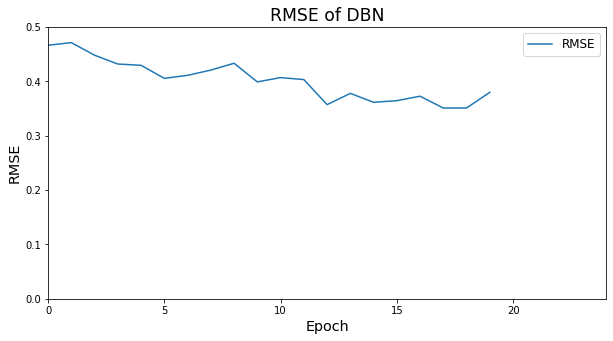

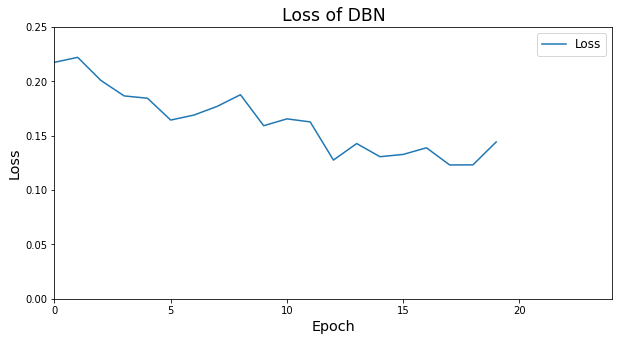

In [ ]:
import matplotlib.pyplot as plt
print(model_dbn.test_df)
loss_list = list()
rmse_list = list()
loss_list = model_dbn.test_df['loss']
rmse_list = model_dbn.test_df['rmse']
def plot_loss(y):
    plt.figure(num=1, figsize=(10, 5))
    plt.title("Loss of DBN",fontsize='xx-large')
    plt.xlim(0, 24)
    plt.ylim(0, 0.25)
    x = np.arange(0,20)
    plt.xlabel('Epoch',fontsize='x-large')
    plt.ylabel('Loss',fontsize='x-large')
    plt.plot(x,y,label = 'Loss')
    plt.legend(fontsize='large')
    plt.show()
  
def plot_rmse(y):
    plt.figure(num=1, figsize=(10, 5))
    plt.title("RMSE of DBN",fontsize='xx-large')
    plt.xlim(0, 24)
    plt.ylim(0, 0.5)
    x = np.arange(0,20)
    plt.xlabel('Epoch',fontsize='x-large')
    plt.ylabel('RMSE',fontsize='x-large')
    plt.plot(x,y,label = 'RMSE')
    plt.legend(fontsize='large')
    plt.show()

plot_rmse(rmse_list)

plot_loss(loss_list)



In [ ]:
test_data_standard

array([[6.16073262e+01, 7.86232810e+01, 4.28122385e+00, ...,
        2.21046612e+00, 2.34957258e-01, 7.49386911e+00],
       [1.27739977e+01, 2.45487083e+01, 8.62968538e+00, ...,
        8.99537054e-01, 1.42027349e-01, 4.06753687e+00],
       [1.60090386e+01, 2.71672641e+01, 1.08063321e+01, ...,
        5.82952558e-01, 9.90115468e-02, 4.75701824e+00],
       ...,
       [4.13158412e+01, 6.47004140e+01, 1.14933923e+01, ...,
        1.62183632e+00, 2.86961672e-01, 8.74755824e+00],
       [1.63290555e+02, 1.39448017e+02, 1.74825143e+01, ...,
        1.43013692e+00, 1.74164605e-01, 8.22618442e+00],
       [4.03093211e+01, 4.69627152e+01, 2.34495533e+01, ...,
        5.09009413e-01, 3.56271171e-02, 6.25248761e+00]])

In [ ]:

train_data_standard,test_data_standard,train_label_standard,test_label_standard =train_test_split(x_plsr,y_plsr, train_size=0.8,test_size=0.2) #sklearn.model_selection.
classifier_standard=svm.SVC()
classifier_standard.fit(model_dbn.pred_Y,test_label_standard)

print(classifier_standard.score(model_dbn.pred_Y,test_label_standard))

0.6484275184275184


## Trained on the combined dataset

In [ ]:
train_data_plsr = train_data_plsr.astype(np.float64)
test_data_plsr = test_data_plsr.astype(np.float64)
train_label_plsr = train_label_plsr.astype(np.bool)
test_label_plsr = test_label_plsr.astype(np.bool)

print(train_label_plsr)
print(test_label_plsr)
parameter = {'struct': [9,16,32,9],
        'h_type': ['Gaussian', 'Binary'],
        'output_func': 'Affine',
        'v_type': ['Binary', 'Binary'],
        'dropout': 0.0,
        'task': 'prd',
        'flatten': True}
model_dbn_plsr = DBN(**parameter)
model_dbn_plsr.load_data((train_data_plsr,train_label_plsr,test_data_plsr,test_label_plsr),1)

[False False False ...  True False False]
[False False False ... False  True  True]

DBN(
  (L): MSELoss()
  (_feature): Sequential(
    (0): Linear(in_features=9, out_features=16, bias=True)
    (1): Affine()
    (2): Linear(in_features=16, out_features=32, bias=True)
    (3): Sigmoid()
  )
  (_output): Sequential(
    (0): Linear(in_features=32, out_features=9, bias=True)
    (1): Affine()
  )
)
DBN's Parameters(
  _feature.0.weight:	torch.Size([16, 9])
  _feature.0.bias:	torch.Size([16])
  _feature.2.weight:	torch.Size([32, 16])
  _feature.2.bias:	torch.Size([32])
  _output.0.weight:	torch.Size([9, 32])
  _output.0.bias:	torch.Size([9])
)
DBN's Optimizer: Adam (
Parameter Group 0
    amsgrad: False
    betas: (0.9, 0.999)
    eps: 1e-08
    lr: 0.001
    weight_decay: 0
)

RBM-1's Parameters(
  unit	Binary-Gaussian
  w	torch.Size([16, 9])
  b	torch.Size([16])
  b2	torch.Size([9])
)

RBM-2's Parameters(
  unit	Binary-Binary
  w	torch.Size([32, 16])
  b	torch.Size([32])
  b2	torch.Siz

In [ ]:
for epoch in range(1, 10 + 1):
    model_dbn_plsr.batch_training(epoch)
    model_dbn_plsr.test(epoch)


Training DBN in cpucuda:
Epoch: 1 - 130/6512 | loss = 0.2149

/usr/local/lib/python3.6/dist-packages/torch/nn/modules/loss.py:445: UserWarning: Using a target size (torch.Size([1])) that is different to the input size (torch.Size([1, 9])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Epoch: 1 - 6512/6512 | loss = 0.2252
    >>> Train: loss = 0.2543   rmse = 0.5043   R2 = -8.1552   
    >>> Test: loss = 0.2489   rmse = 0.4989   R2 = -8.0024   
Epoch: 2 - 6512/6512 | loss = 0.2433
    >>> Train: loss = 0.2536   rmse = 0.5036   R2 = -8.1308   
    >>> Test: loss = 0.2505   rmse = 0.5005   R2 = -8.0594   
Epoch: 3 - 6512/6512 | loss = 0.2924
    >>> Train: loss = 0.2539   rmse = 0.5039   R2 = -8.1405   
    >>> Test: loss = 0.2489   rmse = 0.4989   R2 = -8.0023   
Epoch: 4 - 6512/6512 | loss = 0.1857
    >>> Train: loss = 0.2538   rmse = 0.5038   R2 = -8.1389   
    >>> Test: loss = 0.2597   rmse = 0.5096   R2 = -8.3935   
Epoch: 5 - 6512/6512 | loss = 0.1192
    >>> Train: loss = 0.2541   rmse = 0.5041   R2 = -8.1478   
    >>> Test: loss = 0.2648   rmse = 0.5146   R2 = -8.5753   
Epoch: 6 - 6512/6512 | loss = 0.3030
    >>> Train: loss = 0.2546   rmse = 0.5046   R2 = -8.1665   
    >>> Test: loss = 0.2564   rmse = 0.5063   R2 = -8.2723   
Epoch: 7 - 6512/6512 | loss 

      loss    rmse      R2
0   0.2494  0.4994 -8.0194
1   0.2568  0.5068 -8.2872
2   0.2621  0.5120 -8.4793
3   0.2490  0.4990 -8.0041
4   0.2491  0.4991 -8.0078
5   0.2589  0.5088 -8.3629
6   0.2508  0.5008 -8.0705
7   0.2578  0.5077 -8.3223
8   0.2597  0.5096 -8.3906
9   0.2492  0.4992 -8.0117
10  0.2587  0.5086 -8.3544
11  0.2503  0.5003 -8.0517
12  0.2516  0.5016 -8.1006
13  0.2505  0.5005 -8.0592
14  0.2508  0.5008 -8.0717
15  0.2541  0.5041 -8.1891
16  0.2555  0.5055 -8.2406
17  0.2554  0.5053 -8.2354
18  0.2560  0.5060 -8.2586
19  0.2490  0.4990 -8.0038


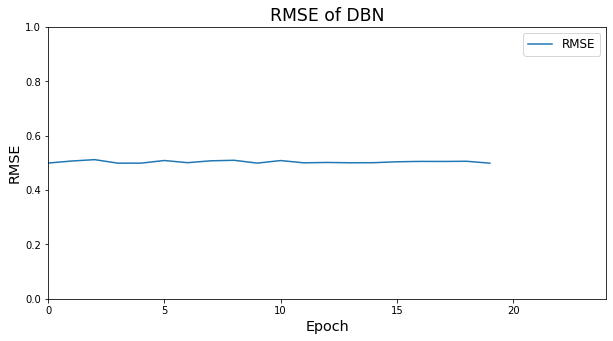

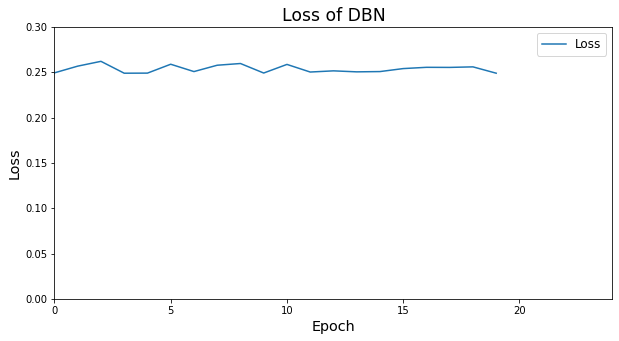

In [ ]:
import matplotlib.pyplot as plt
print(model_dbn_plsr.test_df)
loss_list = list()
rmse_list = list()
loss_list = model_dbn_plsr.test_df['loss']
rmse_list = model_dbn_plsr.test_df['rmse']
def plot_loss(y):
    plt.figure(num=1, figsize=(10, 5))
    plt.title("Loss of DBN",fontsize='xx-large')
    plt.xlim(0, 24)
    plt.ylim(0, 0.3)
    x = np.arange(0,20)
    plt.xlabel('Epoch',fontsize='x-large')
    plt.ylabel('Loss',fontsize='x-large')
    plt.plot(x,y,label = 'Loss')
    plt.legend(fontsize='large')
    plt.show()
  
def plot_rmse(y):
    plt.figure(num=1, figsize=(10, 5))
    plt.title("RMSE of DBN",fontsize='xx-large')
    plt.xlim(0, 24)
    plt.ylim(0, 1)
    x = np.arange(0,20)
    plt.xlabel('Epoch',fontsize='x-large')
    plt.ylabel('RMSE',fontsize='x-large')
    plt.plot(x,y,label = 'RMSE')
    plt.legend(fontsize='large')
    plt.show()

plot_rmse(rmse_list)

plot_loss(loss_list)

In [ ]:
data_list = .tolist()
label_list = test_label_plsr.tolist()

In [ ]:
train_data_standard,test_data_standard,train_label_standard,test_label_standard =train_test_split(x_plsr,y_plsr, train_size=0.8,test_size=0.2) #sklearn.model_selection.
classifier_standard_plsr=svm.SVC()
classifier_standard_plsr.fit(model_dbn.pred_Y,test_label_standard)

print(classifier_standard_plsr.score(model_dbn.pred_Y,test_label_standard))

0.625970515970516
